<a href="https://colab.research.google.com/github/JHJ4012/tensorflow_studying/blob/master/minist_upgrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

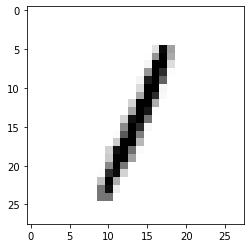

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# tf.set_random_seed(777)  # reproducibility

# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# learning_rate = 0.001
# training_epochs = 15
# batch_size = 100

# X = tf.placeholder(tf.float32, [None, 784])
# Y = tf.placeholder(tf.float32, [None, 10])



# #nn for mnist 
#accuracy : 94.5%
# # W1 = tf.Variable(tf.random_normal([784, 256]))
# # b1 = tf.Variable(tf.random_normal([256]))
# # L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# # W2 = tf.Variable(tf.random_normal([256, 256]))
# # b2 = tf.Variable(tf.random_normal([256]))
# # L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

# # W3 = tf.Variable(tf.random_normal([256, 10]))
# # b3 = tf.Variable(tf.random_normal([10]))
# # hypothesis = tf.matmul(L2, W3) + b3


# #xavier for mnist
#accuracy : 97.8%
# # W1 = tf.get_variable("W1", shape=[784, 256],
# #                      initializer=tf.contrib.layers.xavier_initializer())
# # b1 = tf.Variable(tf.random_normal([256]))
# # L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# # W2 = tf.get_variable("W2", shape=[256, 256],
# #                      initializer=tf.contrib.layers.xavier_initializer())
# # b2 = tf.Variable(tf.random_normal([256]))
# # L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

# # W3 = tf.get_variable("W3", shape=[256, 10],
# #                      initializer=tf.contrib.layers.xavier_initializer())
# # b3 = tf.Variable(tf.random_normal([10]))
# # hypothesis = tf.matmul(L2, W3) + b3



# #deep nn for mnist
#accuracy : 97.4%
# W1 = tf.get_variable("W1", shape=[784, 512],
#                      initializer=tf.contrib.layers.xavier_initializer())
# b1 = tf.Variable(tf.random_normal([512]))
# L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# W2 = tf.get_variable("W2", shape=[512, 512],
#                      initializer=tf.contrib.layers.xavier_initializer())
# b2 = tf.Variable(tf.random_normal([512]))
# L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

# W3 = tf.get_variable("W3", shape=[512, 512],
#                      initializer=tf.contrib.layers.xavier_initializer())
# b3 = tf.Variable(tf.random_normal([512]))
# L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

# W4 = tf.get_variable("W4", shape=[512, 512],
#                      initializer=tf.contrib.layers.xavier_initializer())
# b4 = tf.Variable(tf.random_normal([512]))
# L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

# W5 = tf.get_variable("W5", shape=[512, 10],
#                      initializer=tf.contrib.layers.xavier_initializer())
# b5 = tf.Variable(tf.random_normal([10]))
# hypothesis = tf.matmul(L4, W5) + b5

# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
#     logits=hypothesis, labels=Y))
# optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# sess = tf.Session()
# sess.run(tf.global_variables_initializer())

# for epoch in range(training_epochs):
#     avg_cost = 0
#     total_batch = int(mnist.train.num_examples / batch_size)

#     for i in range(total_batch):
#         batch_xs, batch_ys = mnist.train.next_batch(batch_size)
#         feed_dict = {X: batch_xs, Y: batch_ys}
#         c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
#         avg_cost += c / total_batch

#     print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

# print('Learning Finished!')

# correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# print('Accuracy:', sess.run(accuracy, feed_dict={
#       X: mnist.test.images, Y: mnist.test.labels}))

# r = random.randint(0, mnist.test.num_examples - 1)
# print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
# print("Prediction: ", sess.run(
#     tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()


#dropout nn for mnist
#accuracy : 98.17%
tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)

W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()
